In [1]:
# !pip install scikit-learn
# !pip install pandas
# !pip install matplotlib
# !pip install langchain
# !pip install gpt4all

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import re

from sklearn.metrics import confusion_matrix, classification_report


In [105]:
from gpt4all import GPT4All
# model = GPT4All("orca-mini-3b-gguf2-q4_0.gguf") # downloads / loads a 2GB LLM
model = GPT4All("Llama-3.2-1B-Instruct-Q4_0.gguf") # downloads / loads in less then 1GB LLM

In [3]:
# Checking if model is loaded successfully
# with model.chat_session():
#     print(model.generate("How can I run LLMs efficiently on my laptop?", max_tokens=256))

### 1. Setting up the parameters for running the file 

In [4]:
# Path to directory containing transcript text files
transcripts_dir = 'E:/AXA Data Science Assignment/data/transcripts_v3'

### 2.  Utility Functions

In [5]:
def parse_transcript(file_path):
    """Function to read and parse the transcript from a text file
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = [line.rstrip() for line in file]
        lines = [line for line in lines if line]

    member_conversation_data = []
    agent_conversation_data = []


    for line in lines:
        line = line.strip()
        
        if not line:  # Skip empty lines
            continue
        elif line.startswith("Member"):
            # Set the member text
            try:
                current_text = line.split(":",1)[1].strip()
                member_conversation_data.append(current_text)
            except:
                print("Skipping Lines - ", line)
        else:
            # Save the agent text
            try:
                current_text = line.split(":",1)[1].strip()
                # Skip the call durartion from conversation
                if(line.split(":",1)[0].strip() !="Call duration"):
                    agent_conversation_data.append(current_text)
            except:
                print("Skipping Lines - ", line)

    return {"Original Convesation" : lines,"Agent": agent_conversation_data,"Member":member_conversation_data}


def create_dataframe_from_transcripts(directory):
    """
    Function to create a dataframe from all transcript files
    """
    all_conversations = []
    
    for file_name in os.listdir(directory):
        if file_name.endswith('.txt'):
            file_path = os.path.join(directory, file_name)
            conversation_data = parse_transcript(file_path)
            file_id = re.search('[0-9]+', file_name).group()
            try:
                all_conversations.append({'File_ID':file_id,'File': file_name,'Original Conversation': conversation_data['Original Convesation'],'Agent': conversation_data['Agent'], 'Member': conversation_data['Member']})
            except:
                print("Skipping File : ", file_path)
    # Create a dataframe
    df = pd.DataFrame(all_conversations)
    return df


In [6]:
## Testing the Parser
parse_transcript(file_path="../data/transcripts_v3/transcript_3.txt")

{'Original Convesation': ["Member: Hi, I'm calling about my recent visit to the doctor. I was charged a copay of $50, but I'm sure my policy says it's supposed to be $20.",
  'Customer Support: I apologize for the inconvenience, can you please provide me with your member ID so I can look into this further?',
  "Member: It's MEM123456.",
  "Customer Support: Thank you, Mr./Ms./Mrs./Miss/Mx (Last Name). I've located your account. Can you please confirm the date of the doctor's visit and the name of the doctor you saw?",
  "Member: It was on February 10th, and the doctor's name is Dr. Smith.",
  "Customer Support: Okay, let me check on that. (pause) I'm seeing that the copay for that service is indeed $50 according to our records.",
  "Member: But that's not what my policy says! I'm looking at it right now, and it says I shouldn't have to pay more than $20 for that type of service.",
  'Customer Support: I understand your concern, but I assure you that our records are accurate. However, I

###  3. Parsing the Text File and Splitting the convesation as Member and Agent

In [7]:
# Create dataframe from transcripts
df_transcripts = create_dataframe_from_transcripts(transcripts_dir)
df_transcripts["File_ID"] = df_transcripts["File_ID"].astype("int")
df_transcripts.sort_values("File_ID",inplace=True)
df_transcripts.set_index("File_ID",drop=True,inplace=True,)
# Save to CSV
df_transcripts.to_csv('../test/parsed_transcripts.csv', index=False)

Skipping Lines -  (pause)
Skipping Lines -  (pause)
Skipping Lines -  (Call ended at 9 minutes)
Skipping Lines -  (pause)
Skipping Lines -  (re-connected)
Skipping Lines -  (pause)
Skipping Lines -  (Minute 9)
Skipping Lines -  (Minute 6)
Skipping Lines -  (Minute 8)
Skipping Lines -  (pause)
Skipping Lines -  (pause)
Skipping Lines -  (pause)
Skipping Lines -  (at 2 minutes)
Skipping Lines -  (at 4 minutes)
Skipping Lines -  (at 6 minutes)
Skipping Lines -  (at 7 minutes)
Skipping Lines -  (at 8 minutes)
Skipping Lines -  (pause)
Skipping Lines -  (12 minutes)
Skipping Lines -  (pause)
Skipping Lines -  (pause)
Skipping Lines -  (Pause)
Skipping Lines -  (Call ended)
Skipping Lines -  (pause)
Skipping Lines -  (pause for 2 minutes)
Skipping Lines -  (pause)
Skipping Lines -  (pause)
Skipping Lines -  (pause)
Skipping Lines -  (pause)
Skipping Lines -  pause)
Skipping Lines -  (pause)
Skipping Lines -  (Member holds for 2 minutes)
Skipping Lines -  (The conversation ends after 8 minute

In [8]:
df_transcripts.head()

,File,Original Conversation,Agent,Member
File_ID,,,,
0,transcript_0.txt,"[Member: Hi, I'm calling to get a case pre-aut...","[Hi Emily, thank you for calling PA customer c...","[Hi, I'm calling to get a case pre-authorized...."
1,transcript_1.txt,"[Member: Hi, I'm calling about a denied claim ...","[I apologize for the inconvenience, MEM123456....","[Hi, I'm calling about a denied claim I receiv..."
2,transcript_2.txt,"[Member: Hi, I'm calling about my recent docto...","[I apologize for the inconvenience, Mr. Johnso...","[Hi, I'm calling about my recent doctor's visi..."
3,transcript_3.txt,"[Member: Hi, I'm calling about my recent visit...","[I apologize for the inconvenience, can you pl...","[Hi, I'm calling about my recent visit to the ..."
4,transcript_4.txt,"[Member: Hi, I'd like to schedule an appointme...","[Thank you for calling us, MEM123456. Can you ...","[Hi, I'd like to schedule an appointment with ..."


### Question 1: Use a large language model of your choice to analyse the customer side of the transcript only:

* Identify the sentiment (positive, negative, neutral) of the call
* Determine call outcome (issue resolved, follow-up action needed)

In [10]:
# system_prompt_1 = f"""
#     You are a customer support and sentiment analysis expert. You have to analyse the customer support conversation, but you would only be provided with the customer side of conversation. Kindly analyze it and provive the sentiments and call outcome. 
    
#     ### Directives
#     1. Identify the sentiment of this conversation (positive, negative, or neutral).
#     2. Determine the outcome of the call: was the issue resolved, or does the customer need follow-up action?
#     3. Only provide output with sentiment and call outcome in the following format:
#         Sentiment: <Positive/Negative/Neutral>
#         Call Outcome: <Issue resolved/Follow-up action needed>
#     4. Use below mentioned fewshot examples as references of conversation and LLM response 
    
#     ### Fewshot Examples :
#     'Example 1': ["Hi, I'm calling about a denied claim I received for my recent medical service. I was told that my policy doesn't cover it, but I'm certain it should be covered under my new policy. My member ID is MEM123456.",
#                 'The claim number is CLM789012, and the date of service was February 10th.',
#                 "I switched policies on January 1st. I was told that the new policy would cover the service I received, but the denial letter says it's not covered.",
#                 "That's frustrating. How can we get this resolved?",
#                 "No, that's all. Thank you for your help.",
#                 'Thank you.'],
#     'LLM Response 1': "Sentiment: Neutral \n Call Outcome: Follow-up action needed"

#     'Example 2': ["Hi, I'm calling about my recent visit to the doctor. I was charged a copay of $50, but I'm sure my policy says it's supposed to be $20.",
#                 "It's MEM123456.",
#                 "It was on February 10th, and the doctor's name is Dr. Smith.",
#                 "But that's not what my policy says! I'm looking at it right now, and it says I shouldn't have to pay more than $20 for that type of service.",
#                 '(sighs) Fine.',
#                 "That's ridiculous! I know what my policy says, and I'm not paying $50 for something I shouldn't have to. Can I speak to a supervisor?",
#                 "That's not good enough. I want this resolved now. Can you just waive the extra $30?",
#                 "This is ridiculous. I'm going to report this to my employer and make sure no one else has to deal with this nonsense.",
#                 'Just do it. And can you also send me a confirmation email about this conversation?',
#                 '(angrily) Fine. Thank you for nothing.'],
#     'LLM Response 2': "Sentiment: Negative \n Call Outcome: Follow-up action needed"

#     'Example 3': ["Hi, I'd like to schedule an appointment with a specialist. My member ID is MEM123456.",
#                 "I'm looking for a dermatologist and I was thinking maybe next Wednesday or Thursday. Do you have any availability?",
#                 'That sounds great. Can you tell me a bit more about Dr. Smith and Dr. Johnson? What are their specialties within dermatology?',
#                 "Okay, I think I'd like to schedule an appointment with Dr. Johnson on Thursday at 10 AM.",
#                 "No, that's all. Thank you for your help!",
#                 'Thanks, bye.'],
#     'LLM Response 3': "Sentiment: Positive \n Call Outcome: Issue resolved"
#     """


system_prompt_2 = """You are a customer support analyst. Your task is to analyze customer response from support conversations, determining the sentiment and call outcome based solely on the customer's side of the conversation.

### Instructions:
1. Identify the sentiment as positive, negative, or neutral.
2. Identify call outcome as issue resolved or follow-up needed.
3. Respond only with sentiment and call outcome in the specified format.

Use the provided example for guidance.

##Example:
Customer Response:
  - "Hi, I'd like to schedule an appointment with a specialist. My member ID is MEM123456."
  - "I'm looking for a dermatologist and I was thinking maybe next Wednesday or Thursday. Do you have any availability?"
  - "That sounds great. Can you tell me a bit more about Dr. Smith and Dr. Johnson? What are their specialties within dermatology?"
  - "Okay, I think I'd like to schedule an appointment with Dr. Johnson on Thursday at 10 AM."
  - "No, that's all. Thank you for your help!"
  - "Thanks, bye."
LLM Response:  
  Sentiment: Positive\nCall Outcome: Issue resolved
"""

prompt_template = """Customer Response:
"{transcript}"

Please analyze the customer response and strictly return output in this format:
Sentiment: <Positive/Negative/Neutral>
Call Outcome: <Issue resolved/Follow-up needed>
"""

### 4. Analyze the conversation to extract the sentiments and storing the output for test set

In [23]:

output = None
output_list = []
# Use the LLM
with model.chat_session(system_prompt=system_prompt_2):
    for i in range(160,200):
        member_conv = df_transcripts['Member'].iloc[i]
        prompt = prompt_template.format(transcript = "\n".join(member_conv))
        try: 
            output = model.generate(prompt, max_tokens=150,n_batch=4)
        except:
            print("LLM call unsuccessful")
            output = None
            output_list.append([df_transcripts['File'].iloc[i],"LLM call unsuccessful","","",""])

        if output:
            try : 
                print(f"Output {i} : {output}")
                
                # Extracting sentiment
                sentiment_match = re.search(r'\*\*Sentiment:\*\* (\w+)', output)
                if sentiment_match is None:
                    sentiment_match = re.search(r'\*\*Customer Response:\*\* (\w+)', output)
                sentiment = sentiment_match.group(1) if sentiment_match else None

                # Extracting call outcome
                outcome_match = re.search(r'\*\*Call Outcome:\*\* (.+?)(?:\.|$)', output)
                if outcome_match is None:
                    outcome_match = re.search(r'\*\*Call Outcome:\*\* (.+)', output)
                
                call_outcome = outcome_match.group(1).strip() if outcome_match else None

                output_list.append([df_transcripts['File'].iloc[i],output,sentiment,call_outcome])
            except:
                output_list.append([df_transcripts['File'].iloc[i],output,"",""])

        # Store output after every 3 iterations are complete
        if(i%3 == 0):
            result_df = pd.DataFrame(output_list, columns = ["File","LLM_Output","Sentiment","Call_Outcome"])
            result_df.to_csv("../test/LLM_output_160_199.csv",index=False)

    # Store output again once complete
    result_df = pd.DataFrame(output_list, columns = ["File","LLM_Output","Sentiment","Call_Outcome"])
    result_df.to_csv("../test/LLM_output_160_199.csv",index=False)


Output 189 : ### Sentiment Analysis
- **Sentiment:** Neutral
  - The customer is providing information about their issue, but they are not expressing any strong emotions. They seem to be trying to find a solution rather than being upset or dissatisfied.

### Call Outcome
- **Call Outcome:** Follow-up needed
Output 190 : ### Sentiment Analysis
- **Sentiment:** Positive
  - The customer is expressing frustration with their recent bill, stating they were charged a $50 copay and are certain it was incorrect. They seem to be seeking resolution rather than dissatisfaction.

### Call Outcome
- **Call Outcome:** Issue resolved
Output 191 : ### Sentiment Analysis
- **Sentiment:** Positive
  - The customer is expressing gratitude for assistance with their denied claim, indicating a positive sentiment towards the interaction.

### Call Outcome
- **Call Outcome:** Issue resolved
  - The customer's issue has been successfully addressed by resolving the denial of coverage.
Output 192 : ### Sentiment

### 5. Analyze the conversation to extract the sentiments and storing the output for other dataset

In [22]:

output = None
output_list = []
# Use the LLM
with model.chat_session(system_prompt=system_prompt_2):
    for i in range(0,160):
        member_conv = df_transcripts['Member'].iloc[i]
        prompt = prompt_template.format(transcript = "\n".join(member_conv))
        try: 
            output = model.generate(prompt, max_tokens=100,n_batch=2)
        except:
            print("LLM call unsuccessful")
            output = None
            output_list.append([df_transcripts['File'].iloc[i],"LLM call unsuccessful","","",""])

        if output:
            try : 
                print(f"Output {i} : {output}")
                
                # Extracting sentiment
                sentiment_match = re.search(r'\*\*Sentiment:\*\* (\w+)', output)
                if sentiment_match is None:
                    sentiment_match = re.search(r'\*\*Customer Response:\*\* (\w+)', output)
                sentiment = sentiment_match.group(1) if sentiment_match else None

                # Extracting call outcome
                outcome_match = re.search(r'\*\*Call Outcome:\*\* (.+?)(?:\.|$)', output)
                if outcome_match is None:
                    outcome_match = re.search(r'\*\*Call Outcome:\*\* (.+)', output)
                call_outcome = outcome_match.group(1).strip() if outcome_match else None

                output_list.append([df_transcripts['File'].iloc[i],output,sentiment,call_outcome])
            except:
                output_list.append([df_transcripts['File'].iloc[i],output,"",""])

        # Store output after every 3 iterations are complete
        if(i%3 == 0):
            result_df = pd.DataFrame(output_list, columns = ["File","LLM_Output","Sentiment","Call_Outcome"])
            result_df.to_csv("../test/LLM_output_0_160.csv",index=False)

    # Store output again once complete
    result_df = pd.DataFrame(output_list, columns = ["File","LLM_Output","Sentiment","Call_Outcome"])
    result_df.to_csv("../test/LLM_output_0_160.csv",index=False)


Output 145 : ### Sentiment Analysis
- **Sentiment:** Neutral
  - The customer is initially frustrated with their registration issue but seems to be satisfied after resolving the problem. They mention that they've tried resetting their password and it worked, which suggests a positive outcome.

### Call Outcome
- **Call Outcome:** Issue resolved
Output 146 : ### Sentiment Analysis
- **Sentiment:** Positive
  - The customer is seeking assistance with a denied claim, which indicates they are looking for help and resolution. They also express gratitude after receiving the support.

### Call Outcome
- **Call Outcome:** Issue resolved
  - The customer's issue has been addressed by updating their policy information and reprocessing their claim.
Output 147 : ### Sentiment Analysis
- **Sentiment:** Neutral
  - The customer is seeking help with an issue, but they are hesitant to share their password and instead ask for a hint. They seem uncertain about the security question provided.

### Call O

### 6. Read Output files and calculate the performance

In [86]:
other_results_df1 = pd.read_csv("../test/LLM_output_0_160.csv")
test_results_df1 = pd.read_csv("../test/LLM_output_160_199.csv")

In [95]:
actual_test_df = pd.read_excel("../test/test_actual_label.xlsx")
actual_test_df.head()

,Filename,Sentiment,Call_Outcome
0,transcript_160,Negative,Follow-up needed
1,transcript_161,Positive,Issue resolved
2,transcript_162,Positive,Issue resolved
3,transcript_163,Neutral,Follow-up needed
4,transcript_164,Positive,Issue resolved


Results for Test set
              precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         4
     Neutral       0.50      0.29      0.36         7
    Positive       0.82      0.97      0.89        29

    accuracy                           0.80        40
   macro avg       0.77      0.58      0.64        40
weighted avg       0.78      0.80      0.77        40

Confusion Matrix:
[[ 2  1  1]
 [ 0  2  5]
 [ 0  1 28]]


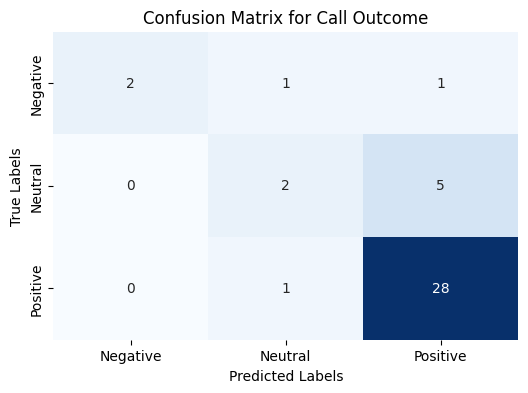

In [106]:
y_true = actual_test_df['Sentiment']
y_pred = test_results_df1['Sentiment']

# Classification Report
class_report = classification_report(y_true, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display results
print("Results for Test set")
print(class_report)
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative','Neutral','Positive'],
            yticklabels=['Negative','Neutral','Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Call Outcome")
plt.show()


Results for Test set
                  precision    recall  f1-score   support

Follow-up needed       1.00      0.19      0.32        16
  Issue resolved       0.65      1.00      0.79        24

        accuracy                           0.68        40
       macro avg       0.82      0.59      0.55        40
    weighted avg       0.79      0.68      0.60        40

Confusion Matrix:
[[ 3 13]
 [ 0 24]]


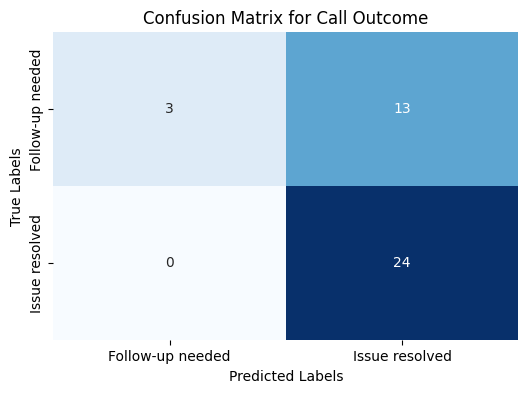

In [103]:
y_true = actual_test_df['Call_Outcome']
y_pred = test_results_df1['Call_Outcome']

# Classification Report
class_report = classification_report(y_true, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display results
print("Results for Test set")
print(class_report)
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Follow-up needed','Issue resolved'],
            yticklabels=['Follow-up needed','Issue resolved'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Call Outcome")
plt.show()